In [1]:
import pandas as pd

df_data = pd.read_excel('titanic3.xls')
#df = pd.read_csv('Dataset_Students_Performancevf.csv')
df_data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [2]:
df_data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [3]:
df_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [4]:
df_data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [5]:
df_data.survived.value_counts()

0    809
1    500
Name: survived, dtype: int64

Text(0, 0.5, 'Nbr des passagers')

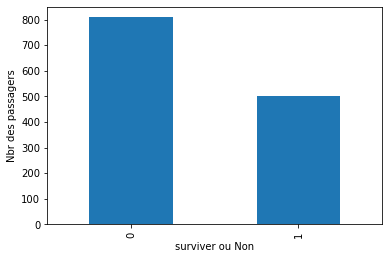

In [6]:
import matplotlib.pyplot as plt

plt = df_data.survived.value_counts().plot.bar()
plt.set_xlabel('surviver ou Non')
plt.set_ylabel('Nbr des passagers')

<AxesSubplot:ylabel='sex'>

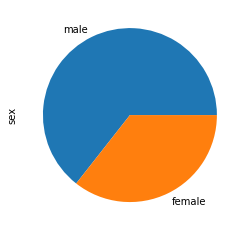

In [7]:
df_data.sex.value_counts().plot(kind = 'pie')

## Data Cleaning

In [8]:
# visualisation des valeures manquantes
column_names =df_data.columns
for column in column_names:
    print(column + ' : ' + str(df_data[column].isnull().sum()))

pclass : 0
survived : 0
name : 0
sex : 0
age : 263
sibsp : 0
parch : 0
ticket : 0
fare : 1
cabin : 1014
embarked : 2
boat : 823
body : 1188
home.dest : 564


In [9]:
# creation d'une copie
df_data_to_clean1 = df_data.copy(deep=True)

In [10]:
# remplacer les valeurs manquantes
df_data_to_clean1.fillna(0, inplace=True) 

In [11]:
# visualisation des valeures manquantes
column_names =df_data_to_clean1.columns
for column in column_names:
    print(column + ' : ' + str(df_data_to_clean1[column].isnull().sum()))

pclass : 0
survived : 0
name : 0
sex : 0
age : 0
sibsp : 0
parch : 0
ticket : 0
fare : 0
cabin : 0
embarked : 0
boat : 0
body : 0
home.dest : 0


## 1.3 Traitement des valeurs manquantes par imputation statistique :

In [108]:
# creation d'une copie
df_data_to_sk = df_data.copy(deep=True)

In [13]:
import numpy as np
from sklearn.impute import SimpleImputer , KNNImputer
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df_data_to_sk[['age']])
df_data_to_sk['age'] = imputer.transform(df_data_to_sk[['age']])

df_data_to_sk.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [14]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df_data_to_sk[['parch']])
df_data_to_sk['parch'] = imputer.transform(df_data_to_sk[['parch']])

df_data_to_sk.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [15]:
imputer = KNNImputer(n_neighbors = 1)
imputer = imputer.fit(df_data_to_sk[['fare']])
df_data_to_sk['fare'] = imputer.transform(df_data_to_sk[['fare']])

df_data_to_sk.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## 1.4 Supprimer les valeurs manquantes des linges (axis=0) / des colonnes (axis=1)


In [16]:
# creation d'une copie
df_data_to_dr = df_data.copy(deep=True)

In [17]:
df_data_to_dr.dropna(thresh=3, inplace=True)

In [18]:
df_data_to_dr.dropna(subset=['home.dest'], inplace=True)

In [19]:
df_data_to_dr.dropna(how='all', inplace=True)

In [20]:
df_data_to_dr.dropna(how='all')
df_data_to_dr.shape

(745, 14)

# C.2 Data cleaning : Traitement des valeurs aberrantes

## C.2.1 Détection des valeurs aberrantes

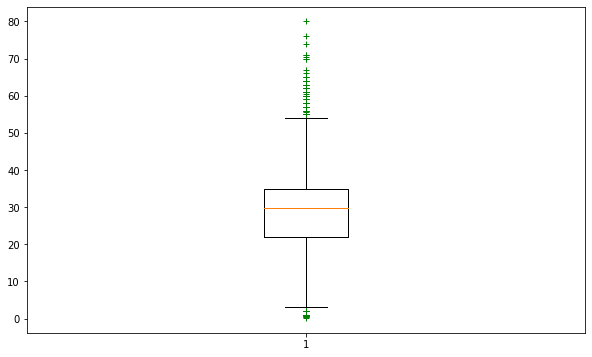

In [21]:
# work with the data that we imlement in SimpleImputer
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
plt.boxplot(df_data_to_sk['age'],sym='g+',vert=1)
plt.show()

In [22]:
Q1 = np.percentile(df_data_to_sk['age'], 25)
Q1

22.0

In [23]:
Q3 = np.percentile(df_data_to_sk['age'], 75)
Q3

35.0

## C.2.2 Traitement des valeurs aberrantes

###  1.1 Remplacer les valeurs aberrantes pour les deux extrémités

In [24]:
IQR = Q3 - Q1

sup = Q3 + 1.5*IQR
inf = Q1 - 1.5*IQR

print('La valeur sup est : ',sup)
print('La valeur inf est : ',inf)
print("Ancian Shape: ", df_data_to_sk.shape)

La valeur sup est :  54.5
La valeur inf est :  2.5
Ancian Shape:  (1309, 14)


###  1.2 Supprimer les valeurs aberrantes

In [25]:
out = df_data_to_sk.loc[(df_data_to_sk['age'] >= sup) | (df_data_to_sk['age'] <= inf)]

print("Nouveau Shape: ", out.shape)

Nouveau Shape:  (101, 14)


In [26]:
df_data_to_sk.loc[df_data_to_sk['age']> sup , 'age'] = sup
df_data_to_sk.loc[df_data_to_sk['age']< inf, 'age'] = inf

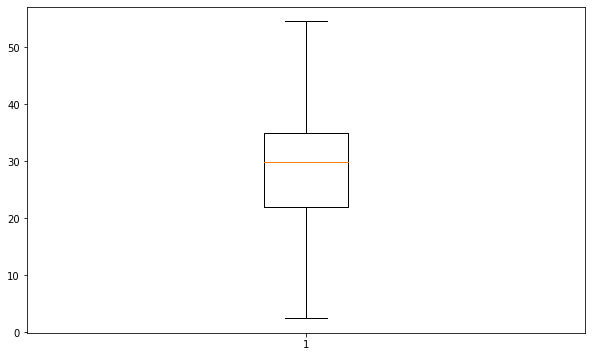

In [27]:
plt.figure(figsize = (10,6))
plt.boxplot(df_data_to_sk['age'],sym='g+',vert=1)
plt.show()

# D. Transformation des données 

## D.1 Traitement des variables catégorielles : Encodage


### 1.1 Détection des modalités d’une variable catégorielle :


**Obtenir les valeurs des deux variables : « sex » et « embarked »**

In [79]:
df_data_to_sk['sex'].unique()

array(['female', 'male'], dtype=object)

In [109]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_data_to_sk['sex_rncod'] = labelencoder.fit_transform(df_data_to_sk['sex'])

df_data_to_sk = df_data_to_sk.drop(columns=['sex'])
df_data_to_sk

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_rncod
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0
1305,3,0,"Zabour, Miss. Thamine",NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1306,3,0,"Zakarian, Mr. Mapriededer",26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,1
1307,3,0,"Zakarian, Mr. Ortin",27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,1


In [110]:
df_data_to_sk['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [111]:
df_data_to_sk = df_data_to_sk[df_data_to_sk['embarked'].notna()]

In [112]:
labelencoder = LabelEncoder()
df_data_to_sk['embarked_encod'] = labelencoder.fit_transform(df_data_to_sk['embarked'])

df_data_to_sk = df_data_to_sk.drop(columns=['embarked'])
df_data_to_sk

C:\Users\Salaheddin\AppData\Local\Temp\ipykernel_12692\900269914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_to_sk['embarked_encod'] = labelencoder.fit_transform(df_data_to_sk['embarked'])


,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,sex_rncod,embarked_encod
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,2,NaN,"St Louis, MO",0,2
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,11,NaN,"Montreal, PQ / Chesterville, ON",1,2
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,2
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",14.5000,1,0,2665,14.4542,NaN,NaN,328.0,NaN,0,0
1305,3,0,"Zabour, Miss. Thamine",NaN,1,0,2665,14.4542,NaN,NaN,NaN,NaN,0,0
1306,3,0,"Zakarian, Mr. Mapriededer",26.5000,0,0,2656,7.2250,NaN,NaN,304.0,NaN,1,0
1307,3,0,"Zakarian, Mr. Ortin",27.0000,0,0,2670,7.2250,NaN,NaN,NaN,NaN,1,0


**Afficher la fréquence de chaque valeur ainsi que le nombre de son apparition.**

<AxesSubplot:>

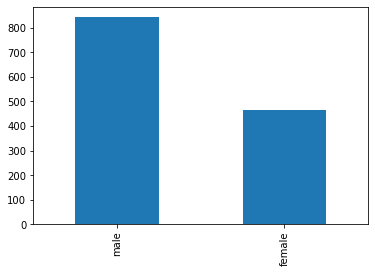

In [31]:
fig, ax = plt.subplots()
df_data_to_sk['sex'].value_counts().plot(ax=ax, kind='bar')

<AxesSubplot:>

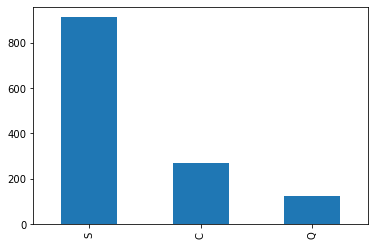

In [32]:
fig, ax = plt.subplots()
df_data_to_sk['embarked'].value_counts().plot(ax=ax, kind='bar')

### 1.2 Traitement des variables catégorielles

**Traiter la variable : embarked avec OneHotEncoder**

In [38]:
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset

ohe = OneHotEncoder()
df_data_to_sk[['embarked_']] = ohe.fit_transform(df_data_to_sk[['embarked']])
print(transformed.toarray())

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['csr_matrix']

In [34]:
df_data_to_sk

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,2.500000,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.500000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


**Traiter la variable sexe avec get_dummies.**

In [ ]:
con = pd.Series(list(df_data_to_sk['sex'].unique()))
print(pd.get_dummies(con))

## D.2 Normalisation

### 1.1 Normalisation avec StandardScaler

In [ ]:
df_data_to_sk.head()

In [ ]:
data_to_scale = df_data_to_sk[['age','sibsp','parch','fare']].astype(float)


In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
scale_dataset = standard_scaler.fit_transform(data_to_scale) 
scale_dataset

### 1.2 NormalisationavecMinMax:Sklearn.preprocessing.MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler( feature_range=(-1, 1))# changer les extremites du scaler
scale_dataset = min_max_scaler.fit_transform(data_to_scale) 
scale_dataset

**Application of the maxAbsScaler**

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
max_Abs_Scaler = MaxAbsScaler()# changer les extremites du scaler
scale_dataset = max_Abs_Scaler.fit_transform(data_to_scale) 
scale_dataset

# Partie complémentaire : Reduction de la dimensionnalité : PCA

In [ ]:
X = df_data_to_sk[['age','sibsp','parch','fare']]
y = df_data_to_sk[['survived']]

In [ ]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

In [ ]:
import numpy as np
features = x_std.T 
covariance_matrix = np.cov(features)
print(covariance_matrix)

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)

In [ ]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color